#### Pavlo Yatluk
#### dz_35_2

### ЗАВДАННЯ

#### Використовуючи дані з файлу petrol_consumption.cvs побудуйте модель множинної регрессії для знаходження залежності між значеннями споживання бензину і похідними факторами. Оцініть якість отриманої регресії.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = r"C:\Users\Pavel\Documents\GitHub\PDS1\Lesson 35\petrol_consumption.xlsx"
petrol_c = pd.read_excel(data)
petrol_c.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


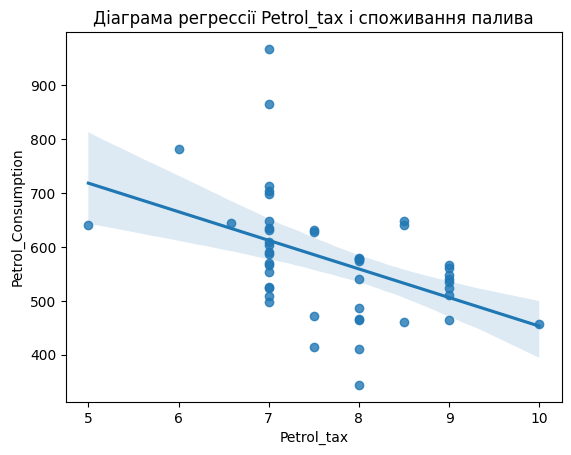

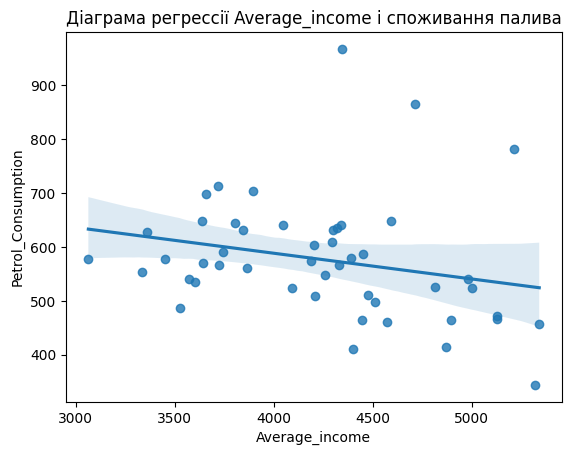

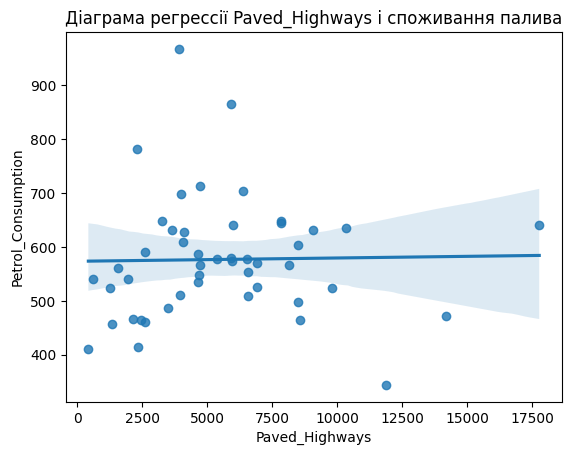

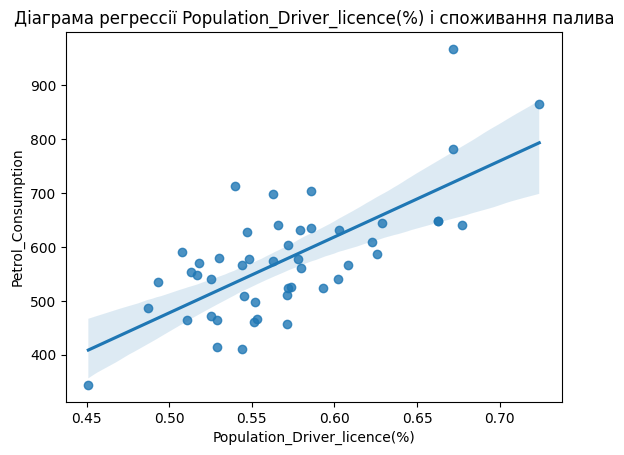

In [7]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y = 'Petrol_Consumption', data=petrol_c).set(title=f"Діаграма регрессії {var} і споживання палива")

In [8]:
correlations = petrol_c[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']].corr()
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037
Average_income,0.012665,1.000000,0.050163,0.157070
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000


In [9]:
X = petrol_c[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = petrol_c['Petrol_Consumption'] 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [12]:
X.shape

(48, 4)

In [13]:
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [14]:
print("beta_0", regression.intercept_)
print("beta_n", regression.coef_)

beta_0 344.58590039674596
beta_n [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [15]:
y_pred = regression.predict(X_test)
result = pd.DataFrame({"Actual" : y_test, "Predicted": y_pred})
result

,Actual,Predicted
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [16]:
print(regression.score(X_train, y_train))

0.6895815278628232


In [17]:
print(regression.score(X_test, y_test))

0.4281868349137987


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
import numpy as np

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [21]:
print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Mean mean squared error: {rmse:.2f}")

Mean absolute error: 58.48
Mean squared error: 3983.85
Mean mean squared error: 63.12


### ВІДПОВІДЬ

#### Отримана лінійна регрессія має показники: MAE = 58.48, MSE = 3983.85, RMSE = 63.12, і виходячи з показника RMSE = 63.12 при 48 значеннях вибірки являється неякісною.